Performing Hypothesis testing using two methods
Rejection Region Method

In [401]:
import pandas as pd
import numpy as np
pd.set_option("display.max_rows",100)
import seaborn as sns

In [402]:
# df=pd.read_excel('DEMO.xlsx',sheet_name="Sheet2")

In [403]:
df=pd.read_csv("worldlink_data.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'worldlink_data.csv'

In [ ]:
df.head()

,Date,Blackquote,Caption,Like Count,Comment Count,Share Count
0,"Sunday, September 24, 2023 at 7:40 PM",0,Have you used our Refer Voucher Code to its fu...,87,13,2
1,"Sunday, September 24, 2023 at 12:54 PM",0,Warmest congratulations to Paras Khadka from W...,157,8,4
2,"Saturday, September 23, 2023 at 7:32 AM",0,Don't miss the upcoming release of the movie '...,153,11,1
3,"Friday, September 22, 2023 at 8:00 AM",0,"Happy World Rhino Day, \nDid you know one-horn...",68,1,1
4,"Wednesday, September 20, 2023 at 7:00 AM",Best wishes for Constitution Day 2075.\n#sambh...,0,94,6,4


In [ ]:
df=df.drop_duplicates()

In [ ]:
df["like count"]=df["Like Count"]

In [ ]:
df["like count"]=df["like count"].dropna()

In [ ]:
pd.set_option('display.max_rows',30)

In [ ]:
df["like count"].head(20)

0       87
1      157
2      153
3       68
4       94
5       90
6      332
7      119
8        0
9      413
10     486
11     199
12     113
13     195
14     173
16    2.8K
17     190
18     356
19     465
20     172
Name: like count, dtype: object

In [ ]:
df['like count'] = pd.to_numeric(df['like count'], errors='coerce')


In [ ]:
df

,Date,Blackquote,Caption,Like Count,Comment Count,Share Count,like count
0,"Sunday, September 24, 2023 at 7:40 PM",0,Have you used our Refer Voucher Code to its fu...,87,13,2,87.0
1,"Sunday, September 24, 2023 at 12:54 PM",0,Warmest congratulations to Paras Khadka from W...,157,8,4,157.0
2,"Saturday, September 23, 2023 at 7:32 AM",0,Don't miss the upcoming release of the movie '...,153,11,1,153.0
3,"Friday, September 22, 2023 at 8:00 AM",0,"Happy World Rhino Day, \nDid you know one-horn...",68,1,1,68.0
4,"Wednesday, September 20, 2023 at 7:00 AM",Best wishes for Constitution Day 2075.\n#sambh...,0,94,6,4,94.0
...,...,...,...,...,...,...,...
109,"Monday, June 19, 2023 at 11:58 AM",0,What do you consider as the strongest aspect o...,56,40,2,56.0
110,"Saturday, June 17, 2023 at 5:00 PM",0,Comment and Get Gifts! \nAs the ICC Men's Cri...,289,162,13,289.0
111,"Friday, June 16, 2023 at 3:38 PM",0,WorldLink + Khalti = The Perfect Duo for conne...,151,20,2,151.0
112,"Thursday, June 15, 2023 at 3:10 PM",0,Best wishes for Nepal's cricket team in the IC...,2.1K,84,23,NaN


In [ ]:
q1=df["like count"].quantile(0.25)
q3=df["like count"].quantile(0.75)
IQR=q3-q1
df=df[df["like count"]<=(q3+(1.5*IQR))]
df=df[df["like count"]>=(q1-(1.5*IQR))]
df=df.reset_index(drop=True)

<Axes: xlabel='like count', ylabel='Density'>

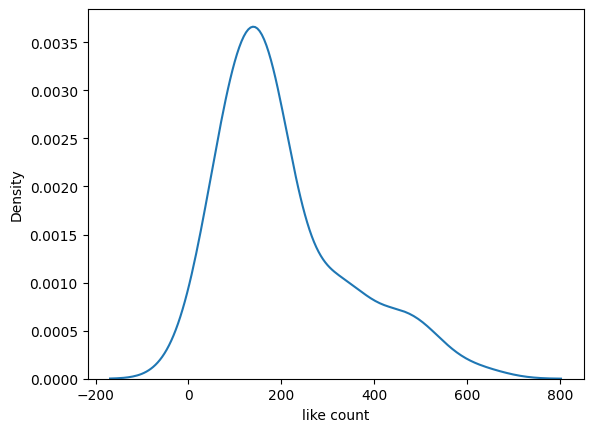

In [ ]:
sns.kdeplot(df["like count"])

C:\Users\Dell\AppData\Local\Temp\ipykernel_16144\1227765732.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df["like count"])


<Axes: xlabel='like count', ylabel='Density'>

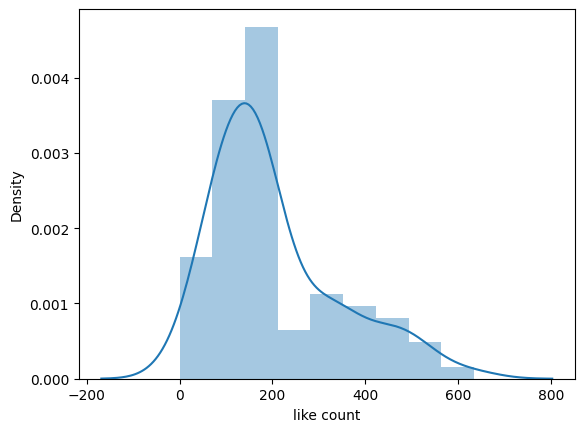

In [ ]:
sns.distplot(df["like count"])

In [ ]:
df["Merged"]

KeyError: 'Merged'

In [ ]:
df3=pd.read_csv('dishhome_fibernet_time.csv')

In [ ]:
df3["Date"]=df3["Date.1"]

In [ ]:
df3

,Date.1,Date.2,Date
0,9/25/2023,10:19:00 AM,9/25/2023
1,9/21/2023,9:21:00 AM,9/21/2023
2,9/20/2023,5:18:00 PM,9/20/2023
3,9/18/2023,7:23:00 AM,9/18/2023
4,9/18/2023,7:08:00 AM,9/18/2023
...,...,...,...
90,1/11/2023,8:00:00 AM,1/11/2023
91,NaN,NaN,NaN
92,12/30/2022,8:09:00 AM,12/30/2022
93,12/25/2022,8:07:00 AM,12/25/2022


In [ ]:
df["Date"]=df["Merged"]

In [ ]:
df3["Date"]=pd.to_datetime(df3["Date"]).dt.date

In [ ]:
df["Date"]=pd.to_datetime(df["Date"]).dt.date

In [ ]:
df=pd.merge(df,df3,how='inner',on="Date")

In [ ]:
df

,content,Merged,like count,comment count,shares,Date,Date.1,Date.2
0,𝐁𝐢𝐠 𝐃𝐚𝐲 𝐟𝐨𝐫 𝐂𝐫𝐢𝐜𝐤𝐞𝐭 :- 𝐍𝐞𝐩𝐚𝐥 𝐕𝐬 𝐈𝐧𝐝𝐢𝐚 - 𝐎𝐧𝐞 𝐁...,2023-09-04,6,NaN,NaN,2023-09-04,9/4/2023,8:30:00 AM
1,"Our satisfied customer, Karna Bahadur Karki fr...",2023-09-03,4,2.0,2.0,2023-09-03,9/3/2023,5:48:00 PM
2,DishHome Fibernet-Times,2023-08-31,3,NaN,NaN,2023-08-31,8/31/2023,7:54:00 AM
3,𝐁𝐢𝐠 𝐃𝐚𝐲 𝐟𝐨𝐫 𝐂𝐫𝐢𝐜𝐤𝐞𝐭 :- 𝐍𝐞𝐩𝐚𝐥 𝐕𝐬 𝐏𝐚𝐤𝐢𝐬𝐭𝐚𝐧 - 𝐎𝐧𝐞...,2023-08-29,7,NaN,NaN,2023-08-29,8/29/2023,4:53:00 PM
4,शुभ नाग पंचमी २०८० !#TCN #TimesBusiness #Times...,2023-08-21,10,1.0,1.0,2023-08-21,8/21/2023,7:50:00 AM
...,...,...,...,...,...,...,...,...
78,Congratulations on your recognition as Top 10 ...,2023-01-12,14,NaN,NaN,2023-01-12,1/12/2023,5:45:00 PM
79,पृथ्वी जयन्ती तथा राष्ट्रिय एकता दिवस २०७९Brin...,2023-01-11,17,1.0,1.0,2023-01-11,1/11/2023,8:00:00 AM
80,तमु ल्होसार २०७९ को हार्दिक शुभकामना!Bring hom...,2022-12-30,9,NaN,NaN,2022-12-30,12/30/2022,8:09:00 AM
81,Merry Christmas 2022!75 Mbps @Rs.595/- per mon...,2022-12-25,7,1.0,1.0,2022-12-25,12/25/2022,8:07:00 AM


In [ ]:
#we have a dataset of like count of about 80. we will divide these into 3 part and calculate the count of like on time
x=[]
df=df[["like count","Date.2"]]
for i in range(3):
    x.append(df.sample(30))


In [ ]:
df3=x[1]
df3=x[2]
df3=x[0]

In [ ]:
time_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,24]
df3["Time Bin"] = pd.cut(df3["Date.2"].dt.hour, bins=time_bins, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
grouped_df = df3.groupby("Time Bin")["like count"].sum().reset_index()
sns.barplot(x="Time Bin", y="like count", data=grouped_df, palette="viridis")

AttributeError: Can only use .dt accessor with datetimelike values

In [404]:
time_bins = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23,24]
df3["Time Bin"] = pd.cut(df3["Date.2"].dt.hour, bins=time_bins, labels=['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23'])
grouped_df = df3.groupby("Time Bin")["like count"].sum().reset_index()
sns.barplot(x="Time Bin", y="like count", data=grouped_df, palette="viridis")


AttributeError: Can only use .dt accessor with datetimelike values

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 [Text(0, 0, '2023-09-27 08:21:00'),
  Text(1, 0, '2023-09-27 07:54:00'),
  Text(2, 0, '2023-09-27 16:24:00'),
  Text(3, 0, '2023-09-27 21:30:00'),
  Text(4, 0, '2023-09-27 07:22:00'),
  Text(5, 0, '2023-09-27 11:05:00'),
  Text(6, 0, '2023-09-27 17:43:00'),
  Text(7, 0, '2023-09-27 12:47:00'),
  Text(8, 0, '2023-09-27 16:51:00'),
  Text(9, 0, '2023-09-27 17:16:00'),
  Text(10, 0, '2023-09-27 17:10:00'),
  Text(11, 0, '2023-09-27 07:31:00'),
  Text(12, 0, '2023-09-27 06:41:00'),
  Text(13, 0, '2023-09-27 07:14:00'),
  Text(14, 0, '2023-09-27 17:54:00'),
  Text(15, 0, '2023-09-27 16:35:00'),
  Text(16, 0, '2023-09-27 17:45:00'),
  Text(17, 0, '2023-09-27 16:37:00'),
  Text(18, 0, '2023-09-27 19:00:00'),
  Text(19, 0, '2023-09-27 08:09:00'),
  Text(20, 0, '2023-09-27 17:15:00'),
  Text(21, 0, '2023-09-27 07:15:00'),
  Text(22, 0, '2023-09-27 17:04:00'),
  

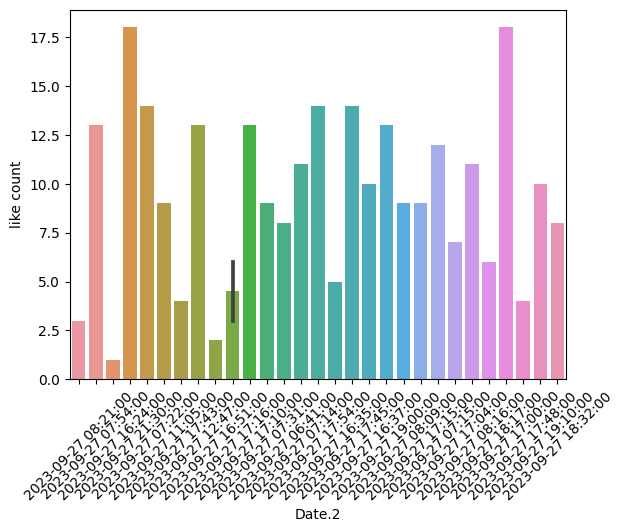

In [ ]:
# from matplotlib import pyplot as plt
# hist, bin_edges = np.histogram(df["like count"], bins=12)
# hist_df = pd.DataFrame({"Like Count": hist, "Bins": bin_edges[:-1]})
# sns.barplot(x="Bins", y="Like Count", data=hist_df, palette="viridis")

sns.barplot(df3,x=df3["Date.2"],y=df["like count"])
plt.xticks(rotation=45)


In [418]:
import pandas as pd

# Assuming df is your DataFrame
# Convert the "Date.2" column to datetime if it's not already
# df['Date'] = pd.to_datetime(df['Date'])

# Define the time range
start_time = pd.to_datetime('17:00:00').time()  # 5:00:00 PM
end_time = pd.to_datetime('18:00:00').time()    # 6:00:00 PM
seven=pd.to_datetime("06:55:00").time()
nine=pd.to_datetime("09:05:00").time()


# Use boolean indexing to filter rows within the time range| (df['Date.2'].dt.time >= seven) & (df['Date.2'].dt.time <= nine)
likes5to6 = df[(df['Date'].dt.time >= start_time) & (df['Date'].dt.time <= end_time) ]


C:\Users\Dell\AppData\Local\Temp\ipykernel_16144\3765652301.py:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'])


DateParseError: day is out of range for month: 0, at position 8

In [407]:
likes5to6

,like count,Date.2
0,6,2023-09-27 08:30:00
1,4,2023-09-27 17:48:00
2,3,2023-09-27 07:54:00
4,10,2023-09-27 07:50:00
5,9,2023-09-27 17:15:00
8,7,2023-09-27 17:04:00
9,6,2023-09-27 08:05:00
10,3,2023-09-27 17:16:00
11,3,2023-09-27 08:07:00
12,6,2023-09-27 17:16:00


In [408]:
fivetosix=likes5to6["like count"]

In [409]:
rows_to_keep = ~((df['Date.2'].dt.time >= start_time) & (df['Date.2'].dt.time <= end_time) & (df['Date.2'].dt.time >= seven) & (df['Date.2'].dt.time <= nine))
df_filtered = df[rows_to_keep]

KeyError: 'Date.2'

In [410]:
other=df_filtered["like count"]

In [411]:
other

0      6
1      4
2      3
3      7
4     10
5      9
6      2
7      6
8      7
9      6
10     3
11     3
12     6
13     6
14    11
15    10
16     6
17     4
18     6
19     8
20     6
21    14
22    14
23    10
24     8
25    13
26    12
27     8
28     8
29     9
30     9
31     8
32     1
33    10
34     1
35     2
36    12
37     5
38     3
39     7
40    10
41     5
42    14
43    11
44     8
45     9
46    13
47    23
48    13
49    13
50    23
51    18
52     9
53     9
54    18
55     9
56     3
57     6
58     7
59     9
60    11
61    12
62    13
63    18
64     9
65     8
66    10
67    10
68    10
69    10
70     6
71     3
72     8
73     6
74    11
75    13
76    10
77    12
78    14
79    17
80     9
81     7
82    10
Name: like count, dtype: int64

In [412]:
fivetosix=likes5to6["like count"]

In [413]:
fivetosix.mean()

9.62962962962963

In [414]:
import numpy as np
from scipy import stats

# Sample data

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(fivetosix, other)

# Define significance level
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of likes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of likes.")


Fail to reject the null hypothesis. There is no significant difference in the average number of likes.


In [ ]:
import numpy as np
from scipy import stats

# Sample data

# Perform a two-sample t-test
t_statistic, p_value = stats.ttest_ind(fivetosix, other)

# Define significance level
alpha = 0.05

# Compare p-value to alpha
if p_value < alpha:
    print("Reject the null hypothesis. There is a significant difference in the average number of likes.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the average number of likes.")

#calculate mean numbers of likes of post posted on 5-6 vs others


In [ ]:
#calculate mean numbers of likes of post posted on 5-6 vs others
import pandas as pd

# Assuming df is your DataFrame
# Convert the "Date.2" column to datetime if it's not already
# df['Date.2'] = pd.to_datetime(df['Date.2'])

# Define the time range
start_time = pd.to_datetime('16:55:00').time()  # 5:00:00 PM
end_time = pd.to_datetime('18:05:00').time()    # 6:00:00 PM

# Use boolean indexing to filter rows within the time range
likes5to6 = df[(df['Date.2'].dt.time >= start_time) & (df['Date.2'].dt.time <= end_time)]

In [ ]:
likes5to6.mean()

like count                        10.285714
Date.2        2023-09-27 17:25:08.571428608
dtype: object

In [ ]:
rows_to_keep = ~((df['Date.2'].dt.time >= start_time) & (df['Date.2'].dt.time <= end_time))
others= df[rows_to_keep]

In [ ]:
likes5to6

,like count,Date.2
0,6,2023-09-27 08:30:00
1,4,2023-09-27 17:48:00
2,3,2023-09-27 07:54:00
4,10,2023-09-27 07:50:00
5,9,2023-09-27 17:15:00
...,...,...
77,12,2023-09-27 08:00:00
78,14,2023-09-27 17:45:00
79,17,2023-09-27 08:00:00
80,9,2023-09-27 08:09:00


In [ ]:
likes5to6.mean()

like count                        10.285714
Date.2        2023-09-27 17:25:08.571428608
dtype: object

In [ ]:
df.head()

,content,Merged,like count,comment count,shares,Date,Date.1,Date.2
0,𝐁𝐢𝐠 𝐃𝐚𝐲 𝐟𝐨𝐫 𝐂𝐫𝐢𝐜𝐤𝐞𝐭 :- 𝐍𝐞𝐩𝐚𝐥 𝐕𝐬 𝐈𝐧𝐝𝐢𝐚 - 𝐎𝐧𝐞 𝐁...,2023-09-04,6,NaN,NaN,2023-09-04,9/4/2023,2023-09-26 08:30:00
1,"Our satisfied customer, Karna Bahadur Karki fr...",2023-09-03,4,2.0,2.0,2023-09-03,9/3/2023,2023-09-26 17:48:00
2,DishHome Fibernet-Times,2023-08-31,3,NaN,NaN,2023-08-31,8/31/2023,2023-09-26 07:54:00
3,𝐁𝐢𝐠 𝐃𝐚𝐲 𝐟𝐨𝐫 𝐂𝐫𝐢𝐜𝐤𝐞𝐭 :- 𝐍𝐞𝐩𝐚𝐥 𝐕𝐬 𝐏𝐚𝐤𝐢𝐬𝐭𝐚𝐧 - 𝐎𝐧𝐞...,2023-08-29,7,NaN,NaN,2023-08-29,8/29/2023,2023-09-26 16:53:00
4,शुभ नाग पंचमी २०८० !#TCN #TimesBusiness #Times...,2023-08-21,10,1.0,1.0,2023-08-21,8/21/2023,2023-09-26 07:50:00


In [ ]:
(fivetosix.mean()-other.mean())/(np.std(df["like count"], ddof=1) / np.sqrt(len(df["like count"])))


4.508537786968751

In [ ]:
df["like count"].count()

83

In [ ]:
df["like count"].mean()+1.96*(df["like count"].std()/np.sqrt(80))

10.006805485998273

In [ ]:
#h0: x=50 null hypothesis that employee unit is same. 
#h1: x>50 alternate hypothesis that the employee unit is different


In [ ]:
#significant level of 0.05 meaninng 95% confidence level


In [ ]:
#data assumption
#sample size>=30 normality valid/ population std known. meaning we use z test


In [ ]:
# z test

In [ ]:
#z statistics
# we have mean of population=50
# mean of sample =53
# std of population =5
# sample size=30(n)

# z=sample mean-population mean/ std/sqrt(population std)

In [ ]:
import random
import numpy as np
x=[]
for i in range(100):
    for i in range(10000):
        x.append(random.randint(1,52))

In [ ]:
x=np.array(x)

In [ ]:
import pandas as pd


In [ ]:
d=(pd.Series.value_counts(x)/pd.Series.value_counts(x).sum())

<Axes: ylabel='Density'>

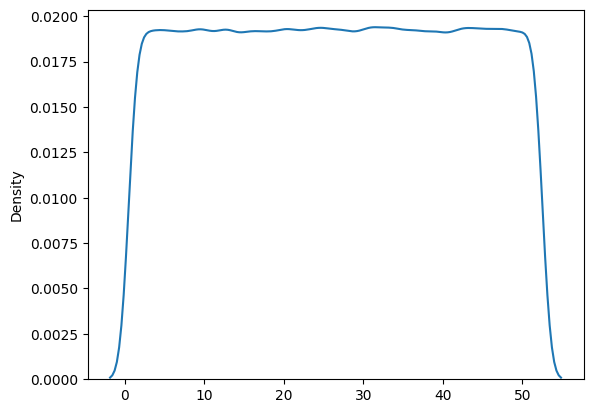

In [ ]:
import seaborn as sns
sns.kdeplot(d.index,x=x)

<Axes: >

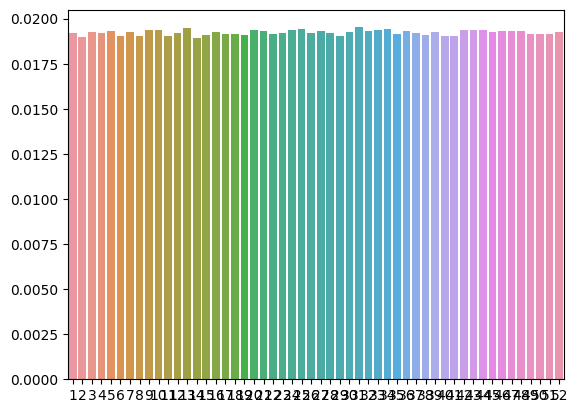

In [ ]:
sns.barplot(x=d.index,y=d.values)

In [ ]:
sns.displot(d,x=x,bins=52)

ValueError: array length 1000000 does not match index length 52